# Minimize Very Complicated Function 

In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

In [6]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

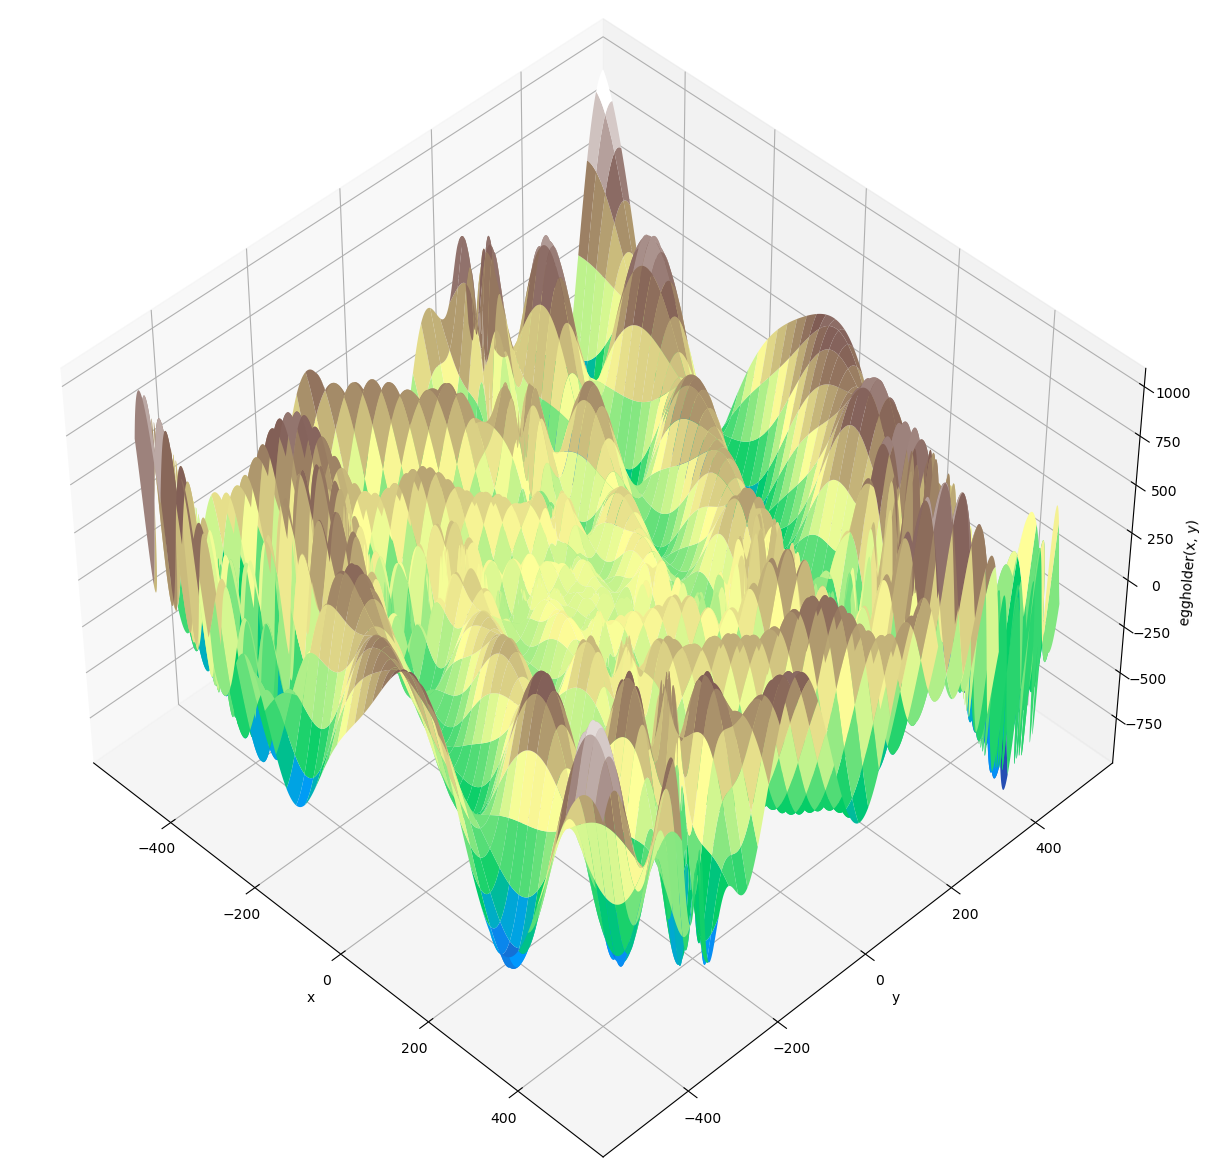

In [7]:
NN = 512
bounds = [(-NN, NN), (-NN, NN)]

x = np.arange(-NN, NN+1)
y = np.arange(-NN, NN+1)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

## Try several different Solver Approaches

In [24]:
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
print(f'Solution using shgo {results["shgo"].fun:.3f}')

Solution using shgo -935.338


In [25]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA'].fun
print(f'Solution using DA {results["DA"].fun:.3f}')

Solution using DA -894.579


In [26]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['DE'].fun
print(f'Solution using DE {results["DE"].fun:.3f}')

Solution using DE -894.579


In [27]:
results['BH'] = optimize.basinhopping(eggholder, bounds)
results['BH'].fun
print(f'Solution using BH {results["BH"].fun:.3f}')

Solution using BH -565.998


In [28]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,sampling_method='sobol')
results['shgo_sobol'].fun
print(f'Solution using shgo_sobol {results["shgo_sobol"].fun:.3f}')

Solution using shgo_sobol -959.641


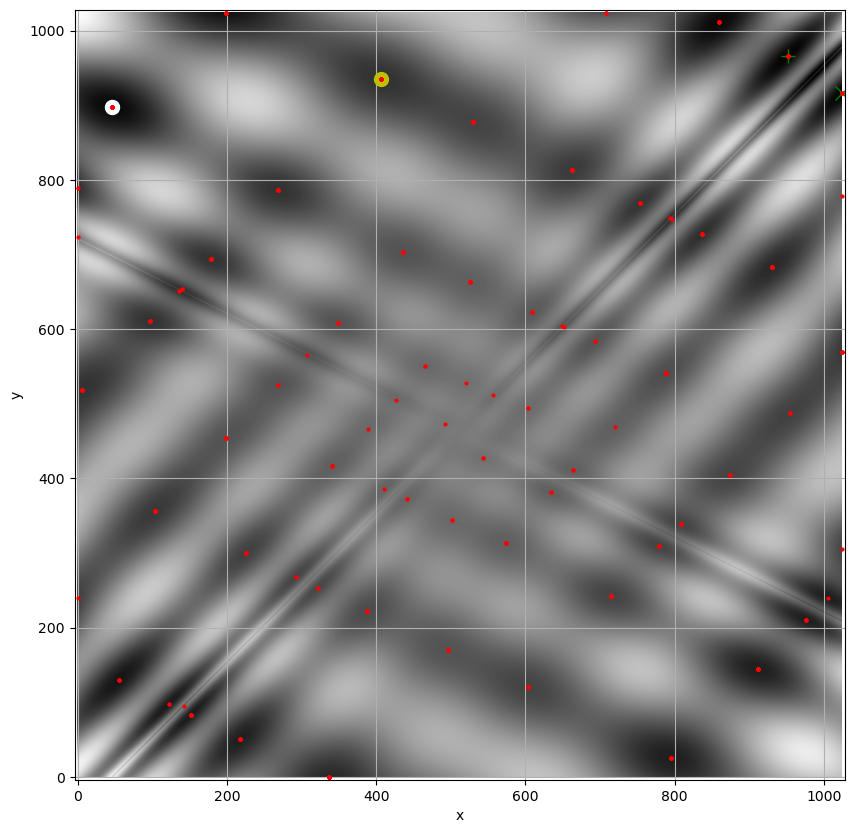

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(NN+res.x[0], NN+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='g', marker='+')
plot_point(results['shgo_sobol'], color='g', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(NN + results['shgo_sobol'].xl[i, 0],NN + results['shgo_sobol'].xl[i, 1],'ro', ms=2)

ax.set_xlim([-4, (NN+2)*2])
ax.set_ylim([-4, (NN+2)*2])
plt.show()